In [ ]:
import osmnx as ox
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


<Axes: >

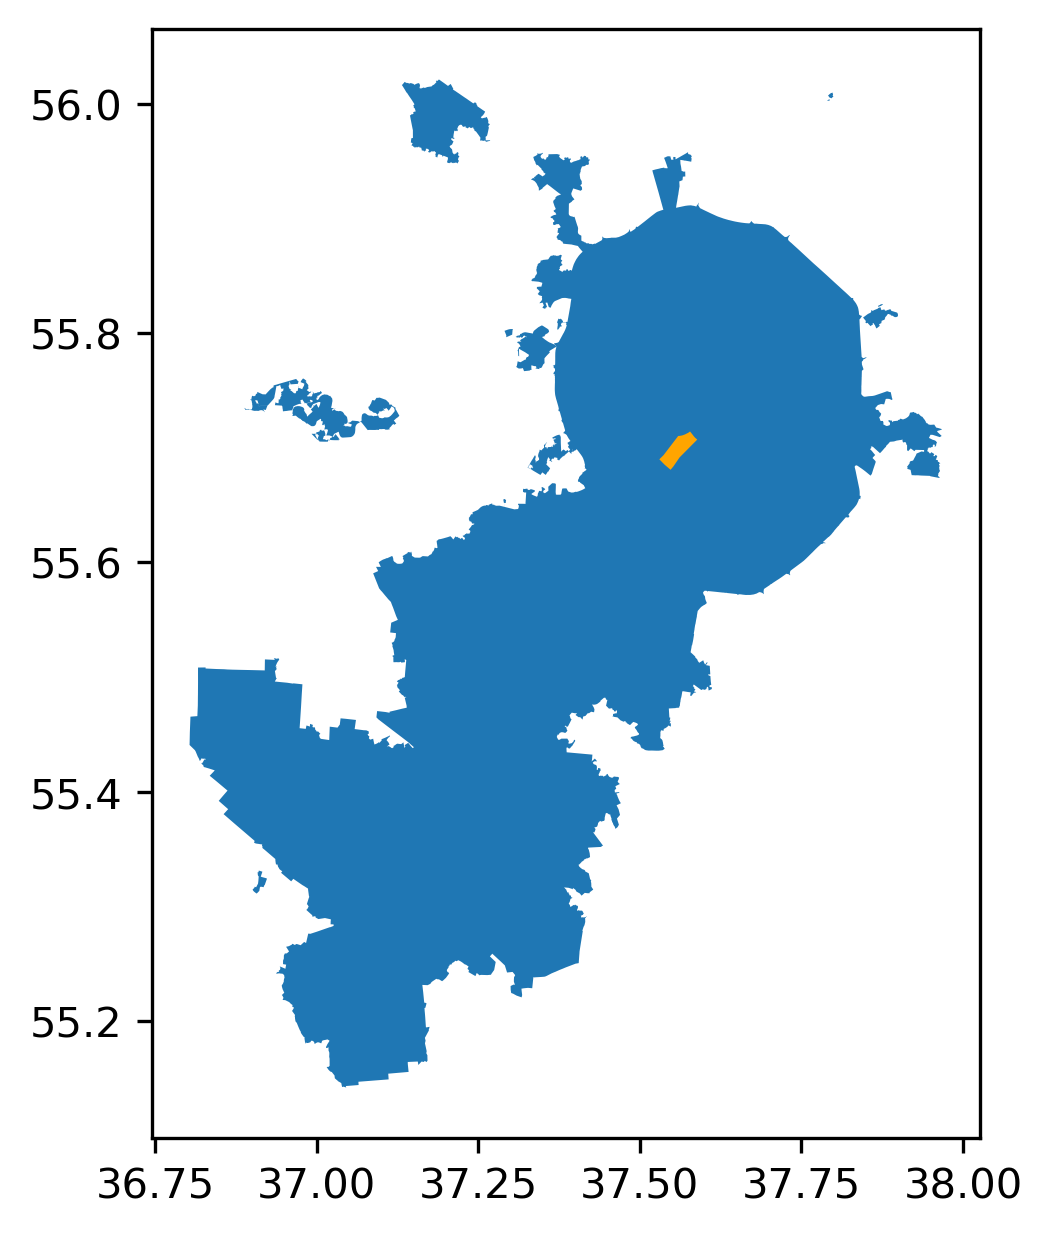

In [4]:
place_name = "Moscow, RU"
area0 = ox.geocode_to_gdf(place_name)
ax = area0.plot()

#place_name1 = "Strogino, Moscow, RU"
place_name1 = "Гагаринский, Москва, Россия"

area = ox.geocode_to_gdf(place_name1)
area.plot(ax = ax, color = 'orange')

In [5]:
area

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((37.53005 55.68993, 37.53013 55.68989...",37.530053,55.680811,37.588753,55.714206,181743566,relation,1281648,55.703461,37.569942,boundary,administrative,14,0.410808,suburb,Gagarinsky District,"Gagarinsky District, Moscow, Central Federal D..."


In [6]:
tags = {'building': True}   

# lons = area.geometry.exterior[0].xy[0]
# lats = area.geometry.exterior[0].xy[1]
# area = Polygon(list(zip(lons, lats)))

buildings = ox.features_from_polygon(area.geometry[0], tags)
buildings.shape

(650, 134)

In [7]:
buildings

geometry  \
element id                                                              
node    4223738891                          POINT (37.56206 55.69823)   
        4436182284                          POINT (37.57063 55.70186)   
        5242681203                          POINT (37.54746 55.68629)   
        6024715389                           POINT (37.5666 55.69476)   
        7545536266                          POINT (37.58473 55.70694)   
...                                                               ...   
way     1349783222  POLYGON ((37.55216 55.68541, 37.55217 55.6854,...   
        1349783229  POLYGON ((37.55344 55.6865, 37.55346 55.68651,...   
        1349783230  POLYGON ((37.55352 55.68654, 37.55378 55.6864,...   
        1349783238  POLYGON ((37.55139 55.68604, 37.55132 55.686, ...   
        1349783239  POLYGON ((37.55103 55.68626, 37.55095 55.68622...   

                      amenity  building building:levels inscription  \
element id                                                            
node    4223738891  ice_cream     kiosk               1   Мороженое   
        4436182284        NaN     kiosk               1         NaN   
        5242681203  ice_cream     kiosk               1   Мороженое   
        6024715389        NaN     kiosk               1      Пресса   
        7545536266        NaN     kiosk               1         NaN   
...                       ...       ...             ...         ...   
way     1349783222        NaN  hospital               2         NaN   
        1349783229        NaN       yes               1         NaN   
        1349783230        NaN       yes               1         NaN   
        1349783238    shelter       yes             NaN         NaN   
        1349783239    shelter       yes             NaN         NaN   

                         shop disused:shop check_date:opening_hours  \
element id                                                            
node    4223738891  ice_cream          NaN                      NaN   
        4436182284        NaN          yes                      NaN   
        5242681203        NaN          NaN                      NaN   
        6024715389  newsagent          NaN               2021-10-01   
        7545536266  newsagent          NaN                      NaN   
...                       ...          ...                      ...   
way     1349783222        NaN          NaN                      NaN   
        1349783229        NaN          NaN                      NaN   
        1349783230        NaN          NaN                      NaN   
        1349783238        NaN          NaN                      NaN   
        1349783239        NaN          NaN                      NaN   

                        opening_hours entrance  ... research colour  \
element id                                      ...                   
node    4223738891                NaN      NaN  ...      NaN    NaN   
        4436182284                NaN      NaN  ...      NaN    NaN   
        5242681203                NaN      NaN  ...      NaN    NaN   
        6024715389  Mo-Fr 07:00-19:00      NaN  ...      NaN    NaN   
        7545536266                NaN      NaN  ...      NaN    NaN   
...                               ...      ...  ...      ...    ...   
way     1349783222                NaN      NaN  ...      NaN    NaN   
        1349783229                NaN      NaN  ...      NaN    NaN   
        1349783230                NaN      NaN  ...      NaN    NaN   
        1349783238                NaN      NaN  ...      NaN    NaN   
        1349783239                NaN      NaN  ...      NaN    NaN   

                   check_date construction club bench shelter_type type  \
element id                                                                
node    4223738891        NaN          NaN  NaN   NaN          NaN  NaN   
        4436182284        NaN          NaN  NaN   NaN          NaN  NaN   
        5242681203        NaN          

In [11]:
buildings['building:levels_float'] = buildings['building:levels'].astype(float)
buildings['area'] = buildings['geometry'].area

C:\Users\mvar9\AppData\Local\Temp\ipykernel_17332\2306012998.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['area'] = buildings['geometry'].area


C:\Users\mvar9\AppData\Local\Temp\ipykernel_17332\3135894564.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings[buildings['geometry'].area > 0].plot(ax = ax) #, column = 'building:levels_float', legend=True)


<Axes: >

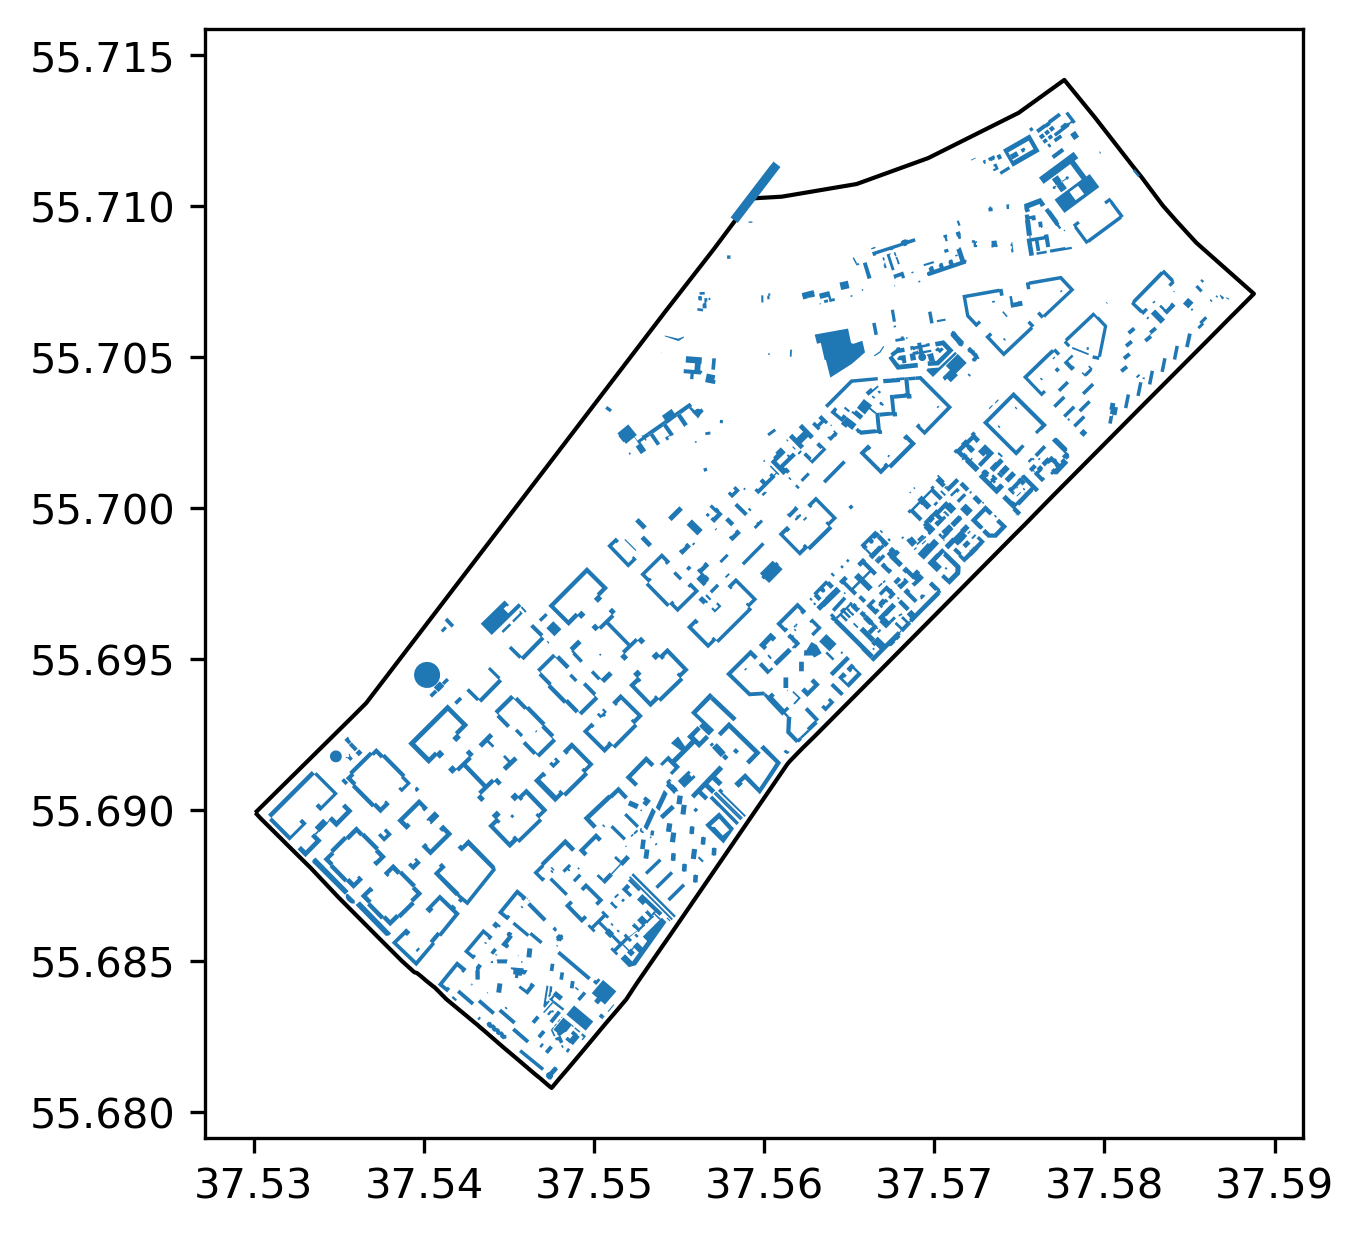

In [15]:
ax = area.plot(facecolor = [0, 0, 0, 0], edgecolor = 'black')

#buildings.plot(ax = ax, column = 'building:levels_float', legend=True)
buildings[buildings['geometry'].area > 0].plot(ax = ax) #, column = 'building:levels_float', legend=True)
